#Salary Prediction Using Linear Regression

In [2]:
import pandas as pd

In [5]:
df = pd.read_csv('/content/experience_salary.csv')

In [6]:
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [9]:
print(df.head())

   YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891


#Checking for missing values

In [10]:
print(df.isnull().sum())

YearsExperience    0
Salary             0
dtype: int64


In [11]:
df.dropna(inplace= True)

#Train-Test Split (80–20)

##Feature Selection

In [22]:
x = df[['YearsExperience']]
y = df['Salary']

In [23]:
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.2 , random_state=42)

In [24]:
x_train

,YearsExperience
28,10.3
24,8.7
12,4.0
0,1.1
4,2.2
16,5.1
5,2.9
13,4.1
11,4.0
22,7.9


In [25]:
x_test

,YearsExperience
27,9.6
15,4.9
23,8.2
17,5.3
8,3.2
9,3.7


#Model Development

In [26]:
reg = LinearRegression()

In [27]:
reg.fit(x_train, y_train)

LinearRegression()

In [30]:
y_pred = reg.predict(x_test)
print(y_pred)

[115790.21011287  71498.27809463 102596.86866063  75267.80422384
  55477.79204548  60189.69970699]


In [45]:
input_df = pd.DataFrame({'YearsExperience': [2]})
predicted_salary = reg.predict(input_df)

print(f"Predicted Salary for 2 years of experience: ₹{predicted_salary[0]:.2f}")

Predicted Salary for 2 years of experience: ₹44169.21


#Evaluate Model Performance using mean absolute error

In [39]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error: 6286.45
Mean Squared Error: 49830096.86
Root Mean Squared Error: 7059.04
R² Score: 0.9024


R² Score
1.00-Perfect prediction (very rare) ,
0.90 – 1.00	Excellent model,
0.75 – 0.90	Good model,
0.50 – 0.75	Moderate — might miss some patterns,
< 0.50	Weak — underfitting or irrelevant features

#PLOTTING

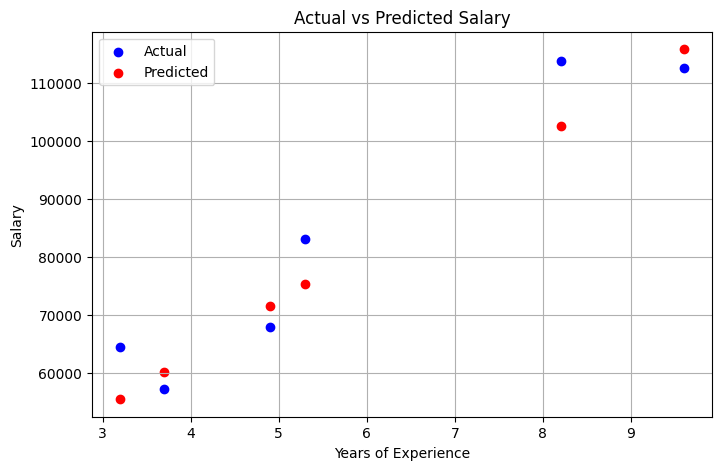

In [36]:
plt.figure(figsize=(8,5))
plt.scatter(x_test, y_test, color='blue', label='Actual')
plt.scatter(x_test, y_pred, color='red', label='Predicted')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Actual vs Predicted Salary')
plt.legend()
plt.grid(True)
plt.show()


#Output

In [37]:
output = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})
output.to_csv("submission.csv", index=False)
print("\n✅ submission.csv has been saved.")




✅ submission.csv has been saved.
